In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
df_feat = pd.read_excel("C:\\Users\\505DY\\Desktop\\Programming\\Machine Learning\\Udemy\\self-trying\\Peritoneal Dialysis\\date and CSV\\is_raw_idd_timeSeries_2.xlsx")
df_iwes = pd.read_csv("C:\\Users\\505DY\\Desktop\\Programming\\Machine Learning\\Udemy\\self-trying\\Peritoneal Dialysis\\date and CSV\\raw infected data\\iwes_raw_idd_draft_1.csv")
df_iwp = pd.read_csv("C:\\Users\\505DY\\Desktop\\Programming\\Machine Learning\\Udemy\\self-trying\\Peritoneal Dialysis\\date and CSV\\raw infected data\\iwp_raw_idd_draft_2.csv")

# Show all tanle in dataframe(code by P'Pon-eak)

In [3]:
from IPython.display import display

def show_more(df, lines):
  temp = pd.options.display.max_rows
  pd.options.display.max_rows = lines
  display(df)
  pd.options.display.max_rows = temp

# Change date column types in iwp and iwes from string to datetime type (code by P'Pon-eak)

In [4]:
iwp_dateCols = ['IntervalStartDate', 'ReferenceDate', 'EDCLoginDate', 'peritonitisdate', 'qFirstCultureDt']
df_iwp[iwp_dateCols] = df_iwp[iwp_dateCols].apply(pd.to_datetime)

In [5]:
iwes_dateCols = ['IntervalStartDate', 'ReferenceDate', 'EDCLoginDate', 'exitsitedate', 'qFirstCultureDt']
df_iwes[iwes_dateCols] = df_iwes[iwes_dateCols].apply(pd.to_datetime)

# Sort values by "infected date(perinonitis[iwp], exitsitedate[iwes])"

In [6]:
df_iwes2=df_iwes.sort_values(by="exitsitedate")
df_iwp2=df_iwp.sort_values(by="peritonitisdate")

# Checking if "peritonitisdate" in iwp is NaN replace it with "qFirstCultureDt"

In [7]:
df_iwp_infect_date=df_iwp2.peritonitisdate.to_list()
for index,date in enumerate(df_iwp2.qFirstCultureDt.to_list()):
    if pd.isna(df_iwp_infect_date[index]) and pd.notna(date):
        df_iwp_infect_date[index]=date
        
df_iwp2.peritonitisdate=df_iwp_infect_date

# Checking if "peritonitisdate" in iwp is NaN replace it with "qFirstCultureDt"

In [8]:
df_iwes_infect_date=df_iwes2.exitsitedate.to_list()
for index,date in enumerate(df_iwes2.qFirstCultureDt.to_list()):
    if pd.isna(df_iwes_infect_date[index]) and pd.notna(date):
        df_iwes_infect_date[index]=date
        
df_iwes2.exitsitedate=df_iwes_infect_date

# Sorting infected date again

In [9]:
df_iwes3=df_iwes2.sort_values(by="exitsitedate")
df_iwp3=df_iwp2.sort_values(by="peritonitisdate")

# iwes and iwp length before dropping NaT rows

In [10]:
print(f"iwp members: {len(df_iwp3)}")
print(f"iwes members: {len(df_iwes3)}")

iwp members: 229
iwes members: 129


# Drop NaT infected row in iwp and iwes 

In [11]:
df_iwes_no_nan=df_iwes3.dropna(subset=["exitsitedate"])
df_iwp_no_nan=df_iwp3.dropna(subset=["peritonitisdate"])

# iwp and iwes length after dropping NaT columns

In [12]:
print(f"iwp members: {len(df_iwp_no_nan)}")
print(f"iwes members: {len(df_iwes_no_nan)}")

iwp members: 216
iwes members: 123


# Delete duplicates data in "Infect" data set 

In [13]:
df_iwes_no_dup=df_iwes_no_nan.drop_duplicates(subset="idd",keep="first") # no duplicated idd in iwes dataframe
df_iwp_no_dup=df_iwp_no_nan.drop_duplicates(subset="idd", keep="first") ## no duplicated idd in iwp dataframe

# iwp and iwes length after dropping duplicates

In [14]:
print(f"iwp members: {len(df_iwp_no_dup)}")
print(f"iwes members: {len(df_iwes_no_dup)}")

iwp members: 136
iwes members: 87


# Concat peritonitisdate(iwp) and exitsitedate(iwes) together

In [15]:
df_infect0 = pd.concat([df_iwp_no_dup[["idd", "peritonitisdate"]],df_iwes_no_dup[["idd","exitsitedate"]]])
df_infect1=df_infect0.sort_values(by="idd") # have a data duplication inside

### Drop duplicated data

In [16]:
df_infect_no_dup=df_infect1.drop_duplicates(subset="idd",keep="first") # date time no duplication

### Drop data that not exist in feature(is_raw_idd)

In [17]:
df_infect_no_dup=df_infect_no_dup.drop(df_infect_no_dup.index[[df_infect_no_dup.idd.to_list().index(x) for x in [8020270,8020260,8020263]]])

In [18]:
len(df_infect_no_dup)# final all infected patients

198

In [19]:
df_infect_no_dup2=df_infect_no_dup.sort_values(by="idd")

In [20]:
my_dict = {i:df_infect_no_dup2.idd.to_list().count(i) for i in df_infect_no_dup.idd.to_list()}

In [21]:
my_dict 

{8000009: 1,
 8000013: 1,
 8000014: 1,
 8000022: 1,
 8000026: 1,
 8000031: 1,
 8000033: 1,
 8000034: 1,
 8000038: 1,
 8000042: 1,
 8001002: 1,
 8001022: 1,
 8001030: 1,
 8001098: 1,
 8001135: 1,
 8001171: 1,
 8001188: 1,
 8001239: 1,
 8001291: 1,
 8001330: 1,
 8001355: 1,
 8001438: 1,
 8001502: 1,
 8003026: 1,
 8003052: 1,
 8003053: 1,
 8003073: 1,
 8003079: 1,
 8003080: 1,
 8003110: 1,
 8003122: 1,
 8003126: 1,
 8003127: 1,
 8003146: 1,
 8003150: 1,
 8003160: 1,
 8003161: 1,
 8003165: 1,
 8003179: 1,
 8003186: 1,
 8003190: 1,
 8004020: 1,
 8004024: 1,
 8004040: 1,
 8004043: 1,
 8004044: 1,
 8004047: 1,
 8004052: 1,
 8004058: 1,
 8004059: 1,
 8004070: 1,
 8004081: 1,
 8004084: 1,
 8004090: 1,
 8004102: 1,
 8004127: 1,
 8004129: 1,
 8004130: 1,
 8004134: 1,
 8004136: 1,
 8004146: 1,
 8005029: 1,
 8005060: 1,
 8005114: 1,
 8005139: 1,
 8005221: 1,
 8005249: 1,
 8005272: 1,
 8005314: 1,
 8005315: 1,
 8005337: 1,
 8005340: 1,
 8005341: 1,
 8006009: 1,
 8006025: 1,
 8006027: 1,
 8006034: 1,

# Merge peritonitisdate(iwp) and exitsitedate(iwes) together

In [22]:
df_infect2 = pd.merge(df_infect_no_dup2.idd,pd.merge(df_iwp_no_dup[["idd","peritonitisdate"]],df_iwes_no_dup[["idd","exitsitedate"]]))[["idd","peritonitisdate","exitsitedate"]] # patients existing in two dataframes 
df_infect2 = df_infect2.sort_values(by="idd")#patienst have two infections

In [23]:
df_infect2

,idd,peritonitisdate,exitsitedate
0,8001188,2016-07-30,2016-03-01
1,8001291,2017-02-10,2016-04-24
2,8001355,2016-04-06,2016-08-26
3,8003073,2016-06-23,2016-02-10
4,8003080,2017-03-17,2016-11-21
5,8004024,2016-08-01,2016-10-25
6,8004059,2016-10-21,2016-09-01
7,8004084,2017-02-01,2016-08-31
8,8008004,2017-02-10,2017-01-18
9,8009185,2016-06-20,2017-01-23


# Find how many is the "only" amount of each iwp and iwes

In [24]:
new_df_iwp_no_dup = pd.merge(df_infect_no_dup2[["idd"]],df_iwp_no_dup.drop(df_iwp_no_dup.index[[df_iwp_no_dup.idd.to_list().index(x) for x in df_infect2.idd.to_list()]]))
new_df_iwes_no_dup = df_iwes_no_dup.drop(df_iwes_no_dup.index[[df_iwes_no_dup.idd.to_list().index(x) for x in df_infect2.idd.to_list()]])

# The union of only amount of iwes and iwp

In [25]:
df_infect_no_dup = pd.concat([new_df_iwp_no_dup[["idd","peritonitisdate"]],new_df_iwes_no_dup[["idd","exitsitedate"]]])

In [26]:
df_infect_no_dup2  = df_infect_no_dup.sort_values(by="idd")

In [27]:
my_dict2 = {i:df_infect_no_dup2.idd.to_list().count(i) for i in df_infect_no_dup2.idd.to_list()}

In [28]:
len(my_dict2)

176

# Create new columns "FirstTimeInfectedDt" to show which one comes first

In [29]:
date_come_first = [] # Check which date
date_come_second = []
date_from = [] # 0 for iwp, 1 for iwes
type_of_infection = [] # 0 for iwp, 1 for iwes, 2 for both
times_of_infection = [] # 1 for single times , 2 for two times 
"""-- Every patients in the dataframe has only a single type of infection, that's why all member in times_of_infection
should be 1 -- """

for i in range(len(df_infect_no_dup2)):
    
    date = df_infect_no_dup2.iloc[i]
    times_of_infection.append(1)
    
    if pd.isna(date["peritonitisdate"]):
        date_come_first.append(date["exitsitedate"])
        date_come_second.append(date["peritonitisdate"])
        date_from.append(1)
        type_of_infection.append(1)
    
    elif pd.isna(date["exitsitedate"]):
        date_come_first.append(date["peritonitisdate"])
        date_come_second.append(date["exitsitedate"])
        type_of_infection.append(0)
        date_from.append(0)
        
df_infect_no_dup2["FirstTimeInfectedDt"]=date_come_first
df_infect_no_dup2["SecondTimeInfectedDt"]=date_come_second
df_infect_no_dup2["DateFrom"]=date_from
df_infect_no_dup2["InfectionTypes"]=type_of_infection
df_infect_no_dup2["TimesOfInfection"]=times_of_infection
df_infect_no_dup2["DateLength"]=[0*i for i in range(len(df_infect_no_dup2))]

In [30]:
df_infect_no_dup2

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength
0,8000009,NaT,2016-01-04,2016-01-04,NaT,1,1,1,0
1,8000013,NaT,2016-05-27,2016-05-27,NaT,1,1,1,0
3,8000014,NaT,2016-05-19,2016-05-19,NaT,1,1,1,0
0,8000022,2016-10-06,NaT,2016-10-06,NaT,0,0,1,0
5,8000026,NaT,2016-03-24,2016-03-24,NaT,1,1,1,0
...,...,...,...,...,...,...,...,...,...
114,8021005,NaT,2017-03-21,2017-03-21,NaT,1,1,1,0
118,8021029,NaT,2016-08-09,2016-08-09,NaT,1,1,1,0
119,8021030,NaT,2016-08-23,2016-08-23,NaT,1,1,1,0
110,8021041,2016-05-17,NaT,2016-05-17,NaT,0,0,1,0


# Find infection date for patients who has 2 types of infection

In [31]:
df_infect_dup =  df_infect2

In [32]:
df_infect_dup=df_infect_dup.sort_values(by="idd")

In [33]:
date_come_first = [] # Check which date
date_come_second = []
date_from = [] # 0 for iwp, 1 for iwes
type_of_infection = [] # 0 for iwp, 1 for iwes, 2 for both
times_of_infection = [] # 1 for single times , 2 for two times 
"""-- Every patients in the dataframe has only two type of infection, that's why all member in times_of_infection
should be 2 -- """

for i in range(len(df_infect_dup)):
    
    date = df_infect_dup.iloc[i]
    times_of_infection.append(2)
    
    if float((date["peritonitisdate"]-date["exitsitedate"]).days) < 0:
        date_come_first.append(date["peritonitisdate"])
        date_come_second.append(date["exitsitedate"])
        type_of_infection.append(2)
        date_from.append(0)
    
    elif float((date["peritonitisdate"]-date["exitsitedate"]).days) > 0:
        date_come_first.append(date["exitsitedate"])
        date_come_second.append(date["peritonitisdate"])
        type_of_infection.append(2)
        date_from.append(1)
        
df_infect_dup["FirstTimeInfectedDt"]=date_come_first
df_infect_dup["SecondTimeInfectedDt"]=date_come_second
df_infect_dup["DateFrom"]=date_from
df_infect_dup["InfectionTypes"]=type_of_infection
df_infect_dup["TimesOfInfection"]=times_of_infection

In [34]:
df_infect_dup

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection
0,8001188,2016-07-30,2016-03-01,2016-03-01,2016-07-30,1,2,2
1,8001291,2017-02-10,2016-04-24,2016-04-24,2017-02-10,1,2,2
2,8001355,2016-04-06,2016-08-26,2016-04-06,2016-08-26,0,2,2
3,8003073,2016-06-23,2016-02-10,2016-02-10,2016-06-23,1,2,2
4,8003080,2017-03-17,2016-11-21,2016-11-21,2017-03-17,1,2,2
5,8004024,2016-08-01,2016-10-25,2016-08-01,2016-10-25,0,2,2
6,8004059,2016-10-21,2016-09-01,2016-09-01,2016-10-21,1,2,2
7,8004084,2017-02-01,2016-08-31,2016-08-31,2017-02-01,1,2,2
8,8008004,2017-02-10,2017-01-18,2017-01-18,2017-02-10,1,2,2
9,8009185,2016-06-20,2017-01-23,2016-06-20,2017-01-23,0,2,2


#  Checking the difference of time interval between "peritonitisdate(iwp)" and "exitsitedate(iwes)" -- how long it is

In [35]:
df_infect_date_length = df_infect_dup.sort_values(by="idd")
date_time_length = []
for i in range(len(df_infect_date_length )):
    
    date = df_infect_date_length.iloc[i]
    
    if date["peritonitisdate"] > date["exitsitedate"]:
        date_time_length.append((date["peritonitisdate"] - date["exitsitedate"]).days)
  
    else:
        date_time_length.append((date["exitsitedate"] - date["peritonitisdate"]).days)
        

df_infect_date_length["DateLength"]=date_time_length

In [36]:
df_infect2_date_length = df_infect_date_length.sort_values("DateLength")

In [37]:
df_infect2_date_length=df_infect2_date_length.sort_values(by="idd")

In [38]:
df_infect_dup=df_infect2_date_length

In [39]:
df_infect2_date_length

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength
0,8001188,2016-07-30,2016-03-01,2016-03-01,2016-07-30,1,2,2,151
1,8001291,2017-02-10,2016-04-24,2016-04-24,2017-02-10,1,2,2,292
2,8001355,2016-04-06,2016-08-26,2016-04-06,2016-08-26,0,2,2,142
3,8003073,2016-06-23,2016-02-10,2016-02-10,2016-06-23,1,2,2,134
4,8003080,2017-03-17,2016-11-21,2016-11-21,2017-03-17,1,2,2,116
5,8004024,2016-08-01,2016-10-25,2016-08-01,2016-10-25,0,2,2,85
6,8004059,2016-10-21,2016-09-01,2016-09-01,2016-10-21,1,2,2,50
7,8004084,2017-02-01,2016-08-31,2016-08-31,2017-02-01,1,2,2,154
8,8008004,2017-02-10,2017-01-18,2017-01-18,2017-02-10,1,2,2,23
9,8009185,2016-06-20,2017-01-23,2016-06-20,2017-01-23,0,2,2,217


# Concat two dataframes(infected with two types and a single type)

In [40]:
df_infect_all = pd.concat([df_infect_dup,df_infect_no_dup2])

In [41]:
df_infect=df_infect_all.sort_values(by="idd")

In [42]:
show_more(df_infect,len(df_infect))

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength
0,8000009,NaT,2016-01-04,2016-01-04,NaT,1,1,1,0
1,8000013,NaT,2016-05-27,2016-05-27,NaT,1,1,1,0
3,8000014,NaT,2016-05-19,2016-05-19,NaT,1,1,1,0
0,8000022,2016-10-06,NaT,2016-10-06,NaT,0,0,1,0
5,8000026,NaT,2016-03-24,2016-03-24,NaT,1,1,1,0
7,8000031,NaT,2016-05-04,2016-05-04,NaT,1,1,1,0
9,8000033,NaT,2016-11-03,2016-11-03,NaT,1,1,1,0
1,8000034,2016-05-17,NaT,2016-05-17,NaT,0,0,1,0
10,8000038,NaT,2016-12-15,2016-12-15,NaT,1,1,1,0
11,8000042,NaT,2017-01-20,2017-01-20,NaT,1,1,1,0


In [43]:
print(f"all infect people: {len(df_infect)}")

all infect people: 198


In [44]:
df_infect_once_feat = pd.merge(df_infect_no_dup2,df_feat,how="inner", on=["idd"]).sort_values(by="idd")

In [45]:
df_infect_once_feat.columns.to_list()

['idd',
 'peritonitisdate',
 'exitsitedate',
 'FirstTimeInfectedDt',
 'SecondTimeInfectedDt',
 'DateFrom',
 'InfectionTypes',
 'TimesOfInfection',
 'DateLength',
 'QuestionnaireID_1',
 'QuestionnaireID_2',
 'QuestionnaireID_3',
 'QuestionnaireID_4',
 'FacilityID',
 'StudyID',
 'PatientID',
 'frn_1',
 'frn_2',
 'frn_3',
 'frn_4',
 'IntervalStartDate_1',
 'IntervalStartDate_2',
 'IntervalStartDate_3',
 'IntervalStartDate_4',
 'ReferenceDate_1',
 'ReferenceDate_2',
 'ReferenceDate_3',
 'ReferenceDate_4',
 'qAbsInit_1',
 'qAbsInit_2',
 'qAbsInit_3',
 'qAbsInit_4',
 'qCompDt_1',
 'qCompDt_2',
 'qCompDt_3',
 'qCompDt_4',
 'qPatStatus_1',
 'qPatStatus_2',
 'qPatStatus_3',
 'qPatStatus_4',
 'qHDHybridTrt_1',
 'qHDHybridTrt_2',
 'qHDHybridTrt_3',
 'qHDHybridTrt_4',
 'qDNRorFullCode_1',
 'qDNRorFullCode_2',
 'qDNRorFullCode_3',
 'qDNRorFullCode_4',
 'qTxWaitStat_1',
 'qTxWaitStat_2',
 'qTxWaitStat_3',
 'qTxWaitStat_4',
 'qNoTxReason_1',
 'qNoTxReason_2',
 'qNoTxReason_3',
 'qNoTxReason_4',
 'qNo

In [46]:
recent_start=df_infect_once_feat.columns.to_list().index("qRecentLabVitalDt01")

In [47]:
count_lab1 = []
for i in range(len(df_infect_once_feat)):
    count_lab1.append(16-df_infect_once_feat.iloc[i,recent_start:recent_start+16].isna().sum(axis=0))
    
df_infect_once_feat["RecentLabVitalCollection"]=count_lab1 

In [48]:
df_infect_once_feat["RecentLabVitalCollection"]

0       7
1      10
2       9
3       5
4       9
       ..
171     6
172     6
173     7
174     8
175     5
Name: RecentLabVitalCollection, Length: 176, dtype: int64

In [49]:
count_rest1=[]

for i in range(len(df_infect_once_feat)):
    c=0
    infection_dt=df_infect_once_feat["FirstTimeInfectedDt"].to_list()[i]    
    date = df_infect_once_feat.iloc[i,recent_start:recent_start+16].to_list()
    for i2,j in enumerate(date):
        if j> infection_dt:
            count_rest1.append(df_infect_once_feat.iloc[i,recent_start:recent_start+i2].notna().sum(axis=0))
            break
        elif pd.notna(j):
            c+=1
    if c == df_infect_once_feat["RecentLabVitalCollection"].iloc[i]:
        count_rest1.append(c)
    

df_infect_once_feat["RecentLabVitalRest"]=count_rest1         

In [50]:
df_infect_once_feat["RecentLabVitalRest"]

0      0
1      4
2      3
3      5
4      3
      ..
171    5
172    2
173    2
174    0
175    5
Name: RecentLabVitalRest, Length: 176, dtype: int64

In [51]:
percent_left = [(float(count_rest1[x])/float(count_lab1[x]))*100 for x in range(176)]

In [52]:
df_infect_once_feat["RestVitalPercentage"]=percent_left 

In [53]:
df_infect_once_feat["RecentLabVitalCut"]=df_infect_once_feat["RecentLabVitalCollection"]-df_infect_once_feat["RecentLabVitalRest"]

In [54]:
df_infect_once_feat["RecentLabVitalCut"]

0      7
1      6
2      6
3      0
4      6
      ..
171    1
172    4
173    5
174    8
175    0
Name: RecentLabVitalCut, Length: 176, dtype: int64

# Checking severe patients feature

In [55]:
severe_feat = pd.merge(df_feat, df_infect2_date_length, how ='inner', on =['idd'])

In [56]:
new_severe_feat=severe_feat.sort_values(by="idd")

In [57]:
# severe_feat.to_csv("C:\\Users\\505DY\\Desktop\\Machine Learning\\Udemy\\self-trying\\Peritoneal Dialysis\\date and CSV\\severe_feat.csv")

# Count data lab times

In [58]:
new_severe_feat.columns.to_list()

['idd',
 'QuestionnaireID_1',
 'QuestionnaireID_2',
 'QuestionnaireID_3',
 'QuestionnaireID_4',
 'FacilityID',
 'StudyID',
 'PatientID',
 'frn_1',
 'frn_2',
 'frn_3',
 'frn_4',
 'IntervalStartDate_1',
 'IntervalStartDate_2',
 'IntervalStartDate_3',
 'IntervalStartDate_4',
 'ReferenceDate_1',
 'ReferenceDate_2',
 'ReferenceDate_3',
 'ReferenceDate_4',
 'qAbsInit_1',
 'qAbsInit_2',
 'qAbsInit_3',
 'qAbsInit_4',
 'qCompDt_1',
 'qCompDt_2',
 'qCompDt_3',
 'qCompDt_4',
 'qPatStatus_1',
 'qPatStatus_2',
 'qPatStatus_3',
 'qPatStatus_4',
 'qHDHybridTrt_1',
 'qHDHybridTrt_2',
 'qHDHybridTrt_3',
 'qHDHybridTrt_4',
 'qDNRorFullCode_1',
 'qDNRorFullCode_2',
 'qDNRorFullCode_3',
 'qDNRorFullCode_4',
 'qTxWaitStat_1',
 'qTxWaitStat_2',
 'qTxWaitStat_3',
 'qTxWaitStat_4',
 'qNoTxReason_1',
 'qNoTxReason_2',
 'qNoTxReason_3',
 'qNoTxReason_4',
 'qNoTxReasonSpecify_1',
 'qNoTxReasonSpecify_2',
 'qNoTxReasonSpecify_3',
 'qNoTxReasonSpecify_4',
 'qTxWaitDt_1',
 'qTxWaitDt_2',
 'qTxWaitDt_3',
 'qTxWaitDt

In [59]:
new_severe_feat.columns.to_list().index('qCompDt_1')

24

In [60]:
recent_lab_start=new_severe_feat.columns.to_list().index('qRecentLabDt01')

In [61]:
count_lab2 = []
for i in range(len(new_severe_feat)):
    count_lab2.append(16-new_severe_feat.iloc[i,recent_lab_start:recent_lab_start+16].isna().sum(axis=0))
    
df_infect2_date_length["RecentLabCollection"]=count_lab2 

In [62]:
df_infect2_date_length

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength,RecentLabCollection
0,8001188,2016-07-30,2016-03-01,2016-03-01,2016-07-30,1,2,2,151,12
1,8001291,2017-02-10,2016-04-24,2016-04-24,2017-02-10,1,2,2,292,11
2,8001355,2016-04-06,2016-08-26,2016-04-06,2016-08-26,0,2,2,142,9
3,8003073,2016-06-23,2016-02-10,2016-02-10,2016-06-23,1,2,2,134,4
4,8003080,2017-03-17,2016-11-21,2016-11-21,2017-03-17,1,2,2,116,12
5,8004024,2016-08-01,2016-10-25,2016-08-01,2016-10-25,0,2,2,85,4
6,8004059,2016-10-21,2016-09-01,2016-09-01,2016-10-21,1,2,2,50,4
7,8004084,2017-02-01,2016-08-31,2016-08-31,2017-02-01,1,2,2,154,3
8,8008004,2017-02-10,2017-01-18,2017-01-18,2017-02-10,1,2,2,23,7
9,8009185,2016-06-20,2017-01-23,2016-06-20,2017-01-23,0,2,2,217,8


In [63]:
iwp_first=df_infect2_date_length[df_infect2_date_length.DateFrom==0].sort_values(by="idd")
iwes_first=df_infect2_date_length[df_infect2_date_length.DateFrom==1].sort_values(by="idd")

#  --------------------------------Visulization Zone-----------------------------------------------

##  Infected people histrogram to show overview of data

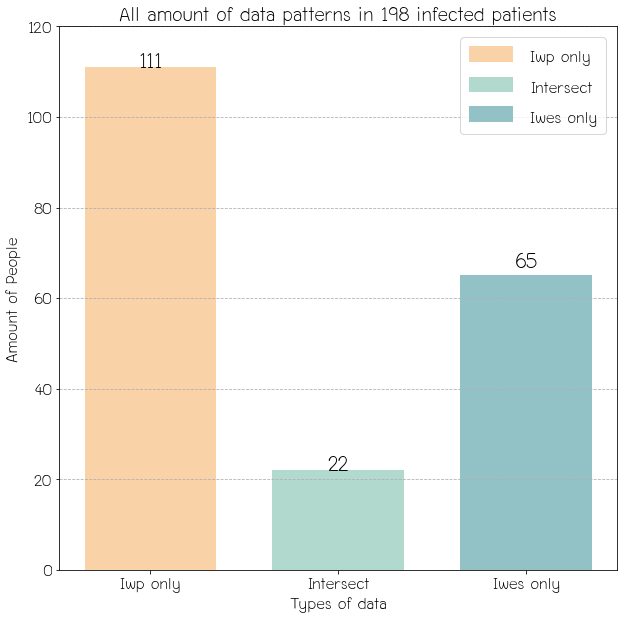

In [64]:
plt.rcParams.update({"font.size":22,"font.family":"Layiji MaHaNiYom BAO"})
plt.figure(figsize=(10,10))


plt.grid(linestyle="--",axis="y")
plt.bar(["Iwp only"],[111],width=0.7,color="#FAD2A7",label="Iwp only")
plt.bar(["Intersect"],[22],width=0.7,color="#B1D9CD",label="Intersect")
plt.bar(["Iwes only"] ,[65],width=0.7,color="#93C2C6",label="Iwes only")


plt.xlabel("Types of data")
plt.ylabel("Amount of People")
plt.title("All amount of data patterns in 198 infected patients")

for tx3,ty3 in list(zip(["Iwp only"],[111])):
  plt.annotate(ty3,
             (tx3,ty3),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)
for tx1,ty1 in list(zip(["Intersect"],[22])):
  plt.annotate(ty1,
             (tx1,ty1),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)

for tx2,ty2 in list(zip(["Iwes only"],[65])):
  plt.annotate(ty2,
             (tx2,ty2),
             textcoords="offset points",
             xytext=(0,8),
             ha="center",
             fontsize=28)
  

plt.legend()
plt.ylim(0,120)
plt.show()


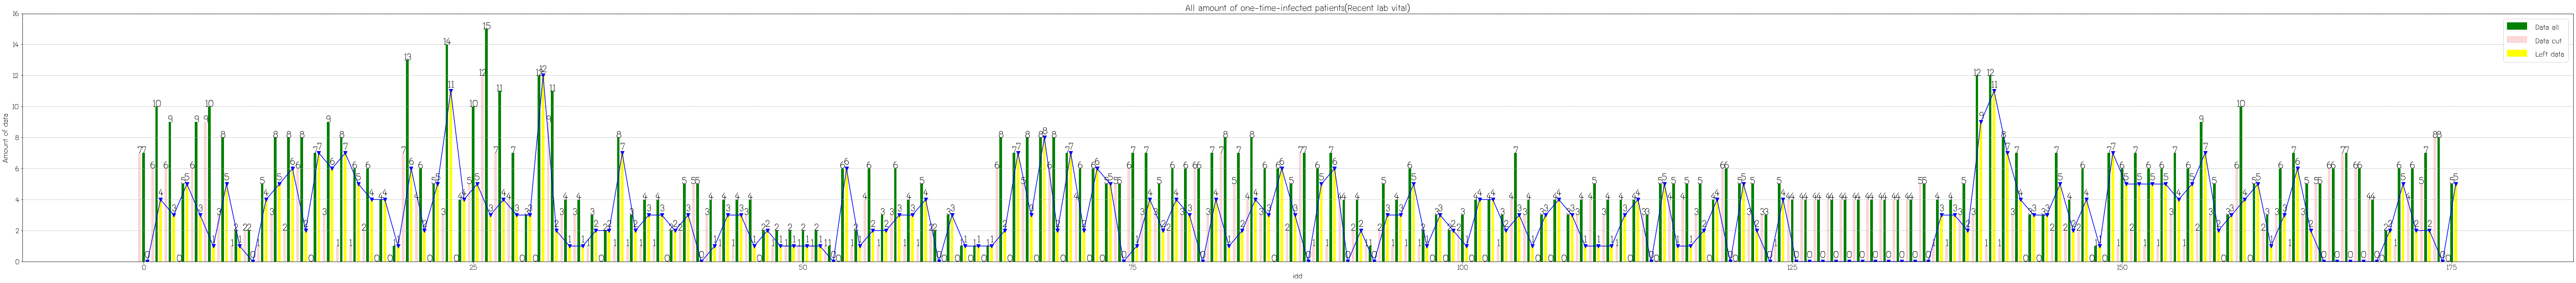

In [65]:
plt.rcParams.update({"font.size":22,"font.family":"Layiji MaHaNiYom BAO"})
plt.figure(figsize=(100,10))


plt.grid(linestyle="--",axis="y")
plt.bar([x for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalCollection"],width=.2,color="Green",label="Data all",alpha=1)
plt.bar([x-0.3 for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalCut"],width=.2,color="#F47C7C",label="Data cut",alpha=0.3)
plt.bar([x+0.3 for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalRest"],width=.2,color="yellow",label="Left data",alpha=1)

plt.plot([x+.3 for x in range(len(df_infect_once_feat["idd"]))] ,df_infect_once_feat["RecentLabVitalRest"] ,color="blue",marker="v",markersize=8)

plt.xlabel("idd")
plt.ylabel("Amount of data")
plt.title("All amount of one-time-infected patients(Recent lab vital)")

for tx3,ty3 in list(zip([x for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalCollection"])):
    plt.annotate(ty3,
             (tx3,ty3),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)
for tx1,ty1 in list(zip([x-.3 for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalCut"])):
    plt.annotate(ty1,
             (tx1,ty1),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)

for tx2,ty2 in list(zip([x+.3 for x in range(len(df_infect_once_feat["idd"]))],df_infect_once_feat["RecentLabVitalRest"])):
    plt.annotate(ty2,
                 (tx2,ty2),
                 textcoords="offset points",
                 xytext=(0,8),
                 ha="center",
                 fontsize=28)

plt.tick_params(axis='x', which='major', labelsize=22)
plt.legend()
plt.ylim(0,16)
plt.show()


In [66]:
ordered_df = pd.merge(df_infect2_date_length.sort_values(by='idd'),df_feat,how="inner",on=["idd"])
my_range=range(1,len(ordered_df.index)+1)

In [67]:
recent_start=ordered_df.columns.to_list().index("qRecentLabDt01")

In [68]:
count_lab3 = []
for i in range(len(ordered_df)):
    count_lab3.append(ordered_df.iloc[i,recent_lab_start:recent_lab_start+16].notna().sum(axis=0))
    
ordered_df["RecentCollection"]=count_lab3 

In [69]:
count_rest1=[]

for i in range(len(ordered_df)):
    c=0
    infection_dt=ordered_df["SecondTimeInfectedDt"].to_list()[i]    
    date = ordered_df.iloc[i,recent_start:recent_start+16].to_list()
    for i2,j in enumerate(date):
        if j> infection_dt:
            count_rest1.append(ordered_df.iloc[i,recent_start:recent_start+i2].notna().sum(axis=0))
            break
        elif pd.notna(j):
            c+=1
    if c == ordered_df["RecentLabCollection"].iloc[i]:
        count_rest1.append(c)
    

ordered_df["RecentLabRest"]=count_rest1   

In [70]:
ordered_df["RecentLabCut"]=ordered_df["RecentLabCollection"]-ordered_df["RecentLabRest"]

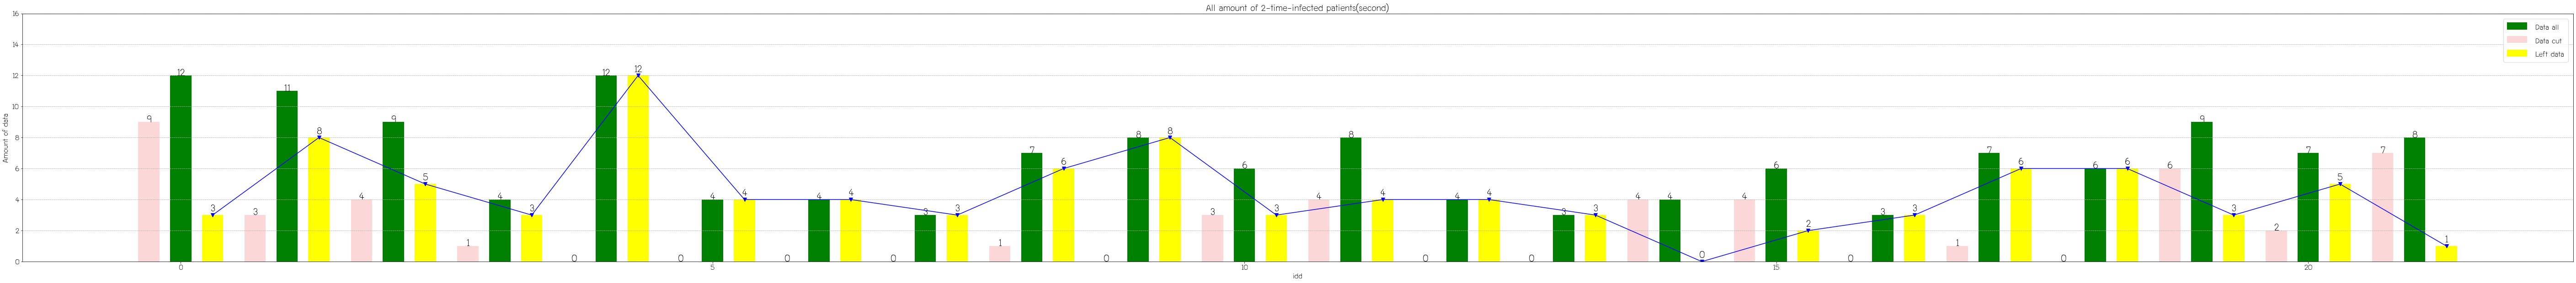

In [71]:
plt.rcParams.update({"font.size":22,"font.family":"Layiji MaHaNiYom BAO"})
plt.figure(figsize=(100,10))


plt.grid(linestyle="--",axis="y")
plt.bar([x for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabCollection"],width=.2,color="Green",label="Data all",alpha=1)
plt.bar([x-0.3 for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabCut"],width=.2,color="#F47C7C",label="Data cut",alpha=0.3)
plt.bar([x+0.3 for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabRest"],width=.2,color="yellow",label="Left data",alpha=1)

plt.plot([x+.3 for x in range(len(ordered_df["idd"]))] ,ordered_df["RecentLabRest"] ,color="blue",marker="v",markersize=8)

plt.xlabel("idd")
plt.ylabel("Amount of data")
plt.title("All amount of 2-time-infected patients(second)")

for tx3,ty3 in list(zip([x for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabCollection"])):
    plt.annotate(ty3,
             (tx3,ty3),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)
for tx1,ty1 in list(zip([x-.3 for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabCut"])):
    plt.annotate(ty1,
             (tx1,ty1),
             textcoords="offset points",
             xytext=(0,0),
             ha="center",
             fontsize=28)

for tx2,ty2 in list(zip([x+.3 for x in range(len(ordered_df["idd"]))],ordered_df["RecentLabRest"])):
    plt.annotate(ty2,
                 (tx2,ty2),
                 textcoords="offset points",
                 xytext=(0,8),
                 ha="center",
                 fontsize=28)

plt.tick_params(axis='x', which='major', labelsize=22)
plt.legend()
plt.ylim(0,16)
plt.show()


Text(0, 0.5, 'idd')

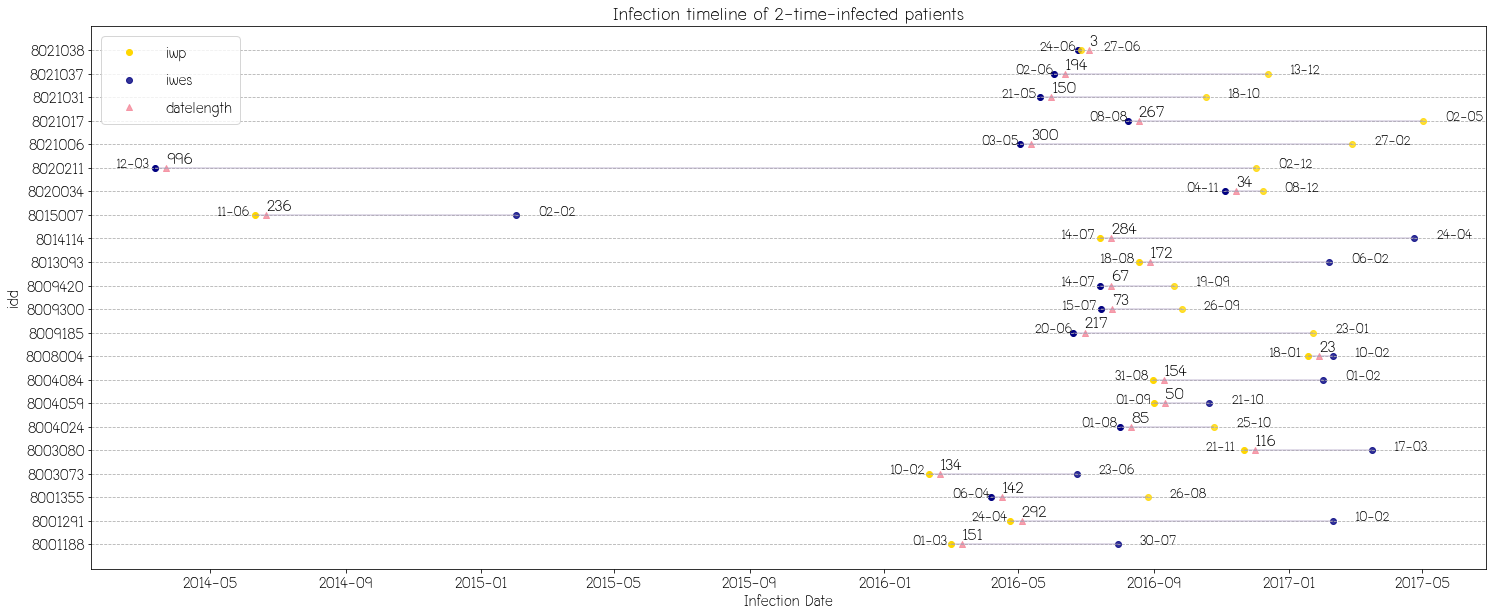

In [72]:
plt.rcParams.update({"font.size":20,"font.family":"Layiji MaHaNiYom BAO"})
plt.figure(figsize=(25,10))
plt.grid(linestyle="--",axis="y")

for i in range(len(df_infect2_date_length)):
    
    first_dt = ordered_df["DateFrom"].iloc[i]
    second_dt = abs(ordered_df["DateFrom"].iloc[i]-1)
    colors=["navy","gold","#F4889A"]
    types=["iwp","iwes","datelength"]
    
    plt.text(ordered_df['FirstTimeInfectedDt'].iloc[i]-pd.Timedelta(35, unit="d"),my_range[i],ordered_df['FirstTimeInfectedDt'].iloc[i].strftime('%d-%m'),fontsize=18)
    plt.text(ordered_df['SecondTimeInfectedDt'].iloc[i]+pd.Timedelta(20, unit="d"),my_range[i],ordered_df['SecondTimeInfectedDt'].iloc[i].strftime('%d-%m'),fontsize=18)
    plt.text(ordered_df['FirstTimeInfectedDt'].iloc[i]+pd.Timedelta(10, unit="d"),my_range[i]+.2,ordered_df['DateLength'].iloc[i],fontsize=22,weight="bold")
    
    plt.scatter(ordered_df['FirstTimeInfectedDt'].iloc[i], my_range[i], color=colors[first_dt],alpha=1,marker="o")
    plt.scatter(ordered_df['SecondTimeInfectedDt'].iloc[i], my_range[i], color=colors[second_dt],alpha=0.8,marker="o")
    plt.scatter(ordered_df['FirstTimeInfectedDt'].iloc[i]+pd.Timedelta(10, unit="d"), my_range[i], color=colors[2],alpha=0.8,marker="^")
    plt.hlines(y=my_range[i], xmin=ordered_df['FirstTimeInfectedDt'].iloc[i], xmax=ordered_df['SecondTimeInfectedDt'].iloc[i], color='#9D8CB8', alpha=0.4)
plt.legend(types)

# Add title and axis names
plt.yticks(my_range, ordered_df['idd'])
plt.title("Infection timeline of 2-time-infected patients", loc='center')
plt.xlabel('Infection Date')
plt.ylabel('idd')

In [73]:
df_infect2_date_length=df_infect2_date_length.sort_values(by='idd')
ordered_df = pd.merge(df_infect2_date_length,df_feat,how="inner",on=["idd"]) 

In [74]:
ordered_df

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength,RecentLabCollection,...,BactInfec07,BactInfec08,BactInfec09,BactInfec10,BactInfec11,BactInfec12,BactInfec13,BactInfec14,BactInfec15,BactInfec16
0,8001188,2016-07-30,2016-03-01,2016-03-01,2016-07-30,1,2,2,151,12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8001291,2017-02-10,2016-04-24,2016-04-24,2017-02-10,1,2,2,292,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8001355,2016-04-06,2016-08-26,2016-04-06,2016-08-26,0,2,2,142,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8003073,2016-06-23,2016-02-10,2016-02-10,2016-06-23,1,2,2,134,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8003080,2017-03-17,2016-11-21,2016-11-21,2017-03-17,1,2,2,116,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
5,8004024,2016-08-01,2016-10-25,2016-08-01,2016-10-25,0,2,2,85,4,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,8004059,2016-10-21,2016-09-01,2016-09-01,2016-10-21,1,2,2,50,4,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,8004084,2017-02-01,2016-08-31,2016-08-31,2017-02-01,1,2,2,154,3,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,8008004,2017-02-10,2017-01-18,2017-01-18,2017-02-10,1,2,2,23,7,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8009185,2016-06-20,2017-01-23,2016-06-20,2017-01-23,0,2,2,217,8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


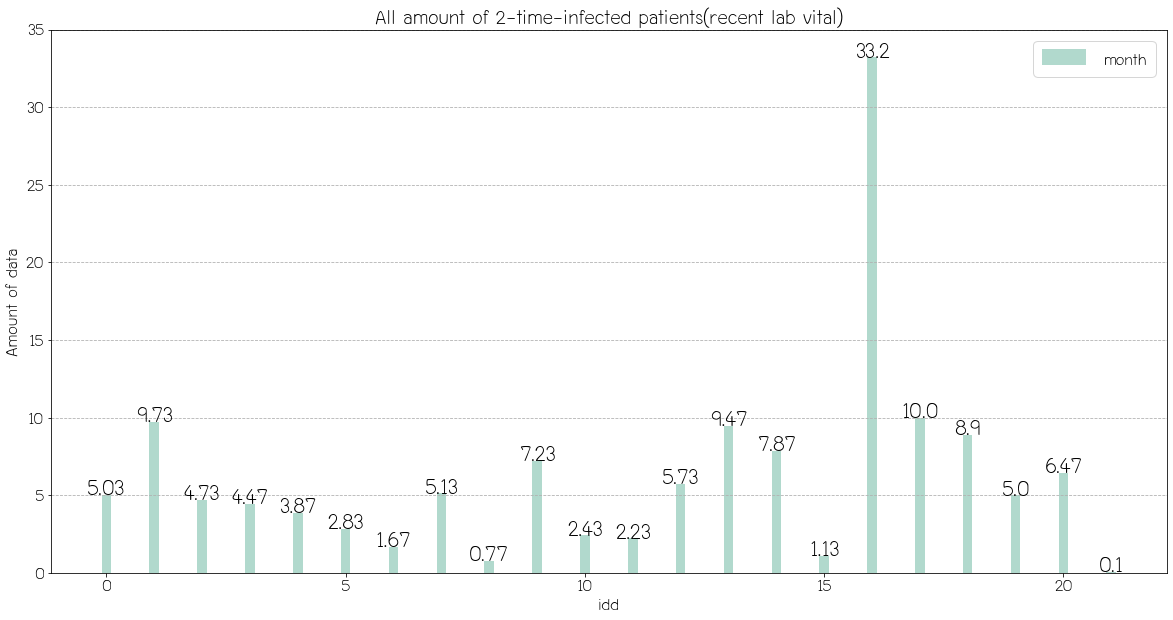

In [75]:
plt.rcParams.update({"font.size":22,"font.family":"Layiji MaHaNiYom BAO"})
plt.figure(figsize=(20,10))


plt.grid(linestyle="--",axis="y")
plt.bar([x for x in range(len(ordered_df["idd"]))],ordered_df["DateLength"]/30,width=.2,color="#B1D9CD",label="month",alpha=1)


plt.xlabel("idd")
plt.ylabel("Amount of data")
plt.title("All amount of 2-time-infected patients(recent lab vital)")

for i in range(len(ordered_df)):
    for tx3,ty3 in list(zip([i], [float("%.2f" % (ordered_df["DateLength"].iloc[i]/30))] )):
        plt.annotate(ty3 ,
                 (tx3,ty3 ),
                 textcoords="offset points",
                 xytext=(0,0),
                 ha="center",
                 fontsize=28)


plt.tick_params(axis='x', which='major', labelsize=22)
plt.legend()
plt.ylim(0,35)
plt.show()


In [76]:
df_infect

,idd,peritonitisdate,exitsitedate,FirstTimeInfectedDt,SecondTimeInfectedDt,DateFrom,InfectionTypes,TimesOfInfection,DateLength
0,8000009,NaT,2016-01-04,2016-01-04,NaT,1,1,1,0
1,8000013,NaT,2016-05-27,2016-05-27,NaT,1,1,1,0
3,8000014,NaT,2016-05-19,2016-05-19,NaT,1,1,1,0
0,8000022,2016-10-06,NaT,2016-10-06,NaT,0,0,1,0
5,8000026,NaT,2016-03-24,2016-03-24,NaT,1,1,1,0
...,...,...,...,...,...,...,...,...,...
19,8021031,2016-05-21,2016-10-18,2016-05-21,2016-10-18,0,2,2,150
20,8021037,2016-06-02,2016-12-13,2016-06-02,2016-12-13,0,2,2,194
21,8021038,2016-06-24,2016-06-27,2016-06-24,2016-06-27,0,2,2,3
110,8021041,2016-05-17,NaT,2016-05-17,NaT,0,0,1,0


In [77]:
normal_people = []

for i in range(len(df_feat.idd.to_list())):
    if df_feat.iloc[i].idd not in df_infect.idd.to_list():
        normal_people.append(df_feat.iloc[i])
        
df_normal_feat = pd.DataFrame(normal_people)
df_normal_feat

,idd,QuestionnaireID_1,QuestionnaireID_2,QuestionnaireID_3,QuestionnaireID_4,FacilityID,StudyID,PatientID,frn_1,frn_2,...,BactInfec07,BactInfec08,BactInfec09,BactInfec10,BactInfec11,BactInfec12,BactInfec13,BactInfec14,BactInfec15,BactInfec16
0,8000001,41161,66138.0,82192.0,93175.0,118000,1,12953,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000004,41163,66139.0,82193.0,93176.0,118000,4,12956,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8000005,41164,66140.0,82194.0,93177.0,118000,5,12957,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8000008,41165,66141.0,82195.0,93178.0,118000,8,12962,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8000010,41167,66143.0,82197.0,93180.0,118000,10,12964,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,8021040,68766,83909.0,95767.0,NaN,118021,40,18739,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
670,8021044,68770,83912.0,95770.0,NaN,118021,44,18746,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
671,8021062,95771,NaN,NaN,NaN,118021,62,23050,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,8021063,95764,NaN,NaN,NaN,118021,63,23051,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
infected_people = []

for i in range(len(df_feat.idd.to_list())):
    if df_feat.iloc[i].idd  in df_infect.idd.to_list():
        infected_people.append(df_feat.iloc[i])
        
df_infected_feat = pd.DataFrame(infected_people)
df_infected_feat

,idd,QuestionnaireID_1,QuestionnaireID_2,QuestionnaireID_3,QuestionnaireID_4,FacilityID,StudyID,PatientID,frn_1,frn_2,...,BactInfec07,BactInfec08,BactInfec09,BactInfec10,BactInfec11,BactInfec12,BactInfec13,BactInfec14,BactInfec15,BactInfec16
4,8000009,41166,66142.0,82196.0,93179.0,118000,9,12963,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8000013,41170,66146.0,82213.0,93202.0,118000,13,12967,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8000014,41171,66147.0,82214.0,93203.0,118000,14,12968,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,8000022,41177,66153.0,82207.0,NaN,118000,22,12976,0,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,8000026,41181,66156.0,82210.0,93198.0,118000,26,12980,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,8021031,68761,83905.0,95775.0,NaN,118021,31,18725,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
665,8021037,68763,83907.0,95777.0,NaN,118021,37,18736,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
666,8021038,68764,83908.0,95766.0,NaN,118021,38,18737,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
668,8021041,68767,83910.0,95768.0,NaN,118021,41,18741,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [79]:
df_infected_feat

,idd,QuestionnaireID_1,QuestionnaireID_2,QuestionnaireID_3,QuestionnaireID_4,FacilityID,StudyID,PatientID,frn_1,frn_2,...,BactInfec07,BactInfec08,BactInfec09,BactInfec10,BactInfec11,BactInfec12,BactInfec13,BactInfec14,BactInfec15,BactInfec16
4,8000009,41166,66142.0,82196.0,93179.0,118000,9,12963,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8000013,41170,66146.0,82213.0,93202.0,118000,13,12967,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,8000014,41171,66147.0,82214.0,93203.0,118000,14,12968,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,8000022,41177,66153.0,82207.0,NaN,118000,22,12976,0,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
18,8000026,41181,66156.0,82210.0,93198.0,118000,26,12980,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,8021031,68761,83905.0,95775.0,NaN,118021,31,18725,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
665,8021037,68763,83907.0,95777.0,NaN,118021,37,18736,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
666,8021038,68764,83908.0,95766.0,NaN,118021,38,18737,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
668,8021041,68767,83910.0,95768.0,NaN,118021,41,18741,0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [80]:
df_infected_feat["idd"].duplicated().any()

False

In [81]:
df_infected_feat.to_csv("C:\\Users\\505DY\\Desktop\\Programming\\Machine Learning\\Udemy\\self-trying\\Peritoneal Dialysis\\date and CSV\\raw infected data\\infected people.csv")